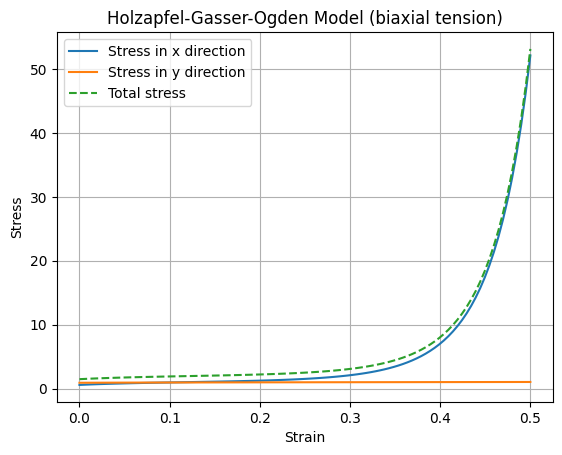

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def holzapfel_gasser_ogden_model_biaxial_tension(strain_x, strain_y, params):
    C = params['C']
    k1 = params['k1']
    k2 = params['k2']
    kappa = params['kappa']
    theta = params['theta']

    # Strain invariants for biaxial tension
    I1 = 1 + 2 * (strain_x + strain_y)  # First invariant
    I4_x = 1 + 2 * strain_x * np.cos(theta)**2  # Invariant associated with fibers in the x direction
    I4_y = 1 + 2 * strain_y * np.sin(theta)**2  # Invariant associated with fibers in the y direction

    # Energy of deformation of an isotropic matrix
    Psi_iso = C * (I1 - 3)

    # Strain energy of the anisotropic part (fiber)
    E_fiber_x = kappa * (I1 - 3) + (1 - 3 * kappa) * (I4_x - 1)
    E_fiber_y = kappa * (I1 - 3) + (1 - 3 * kappa) * (I4_y - 1)
    Psi_aniso_x = (k1 / (2 * k2)) * (np.exp(k2 * E_fiber_x**2) - 1)
    Psi_aniso_y = (k1 / (2 * k2)) * (np.exp(k2 * E_fiber_y**2) - 1)

    # Total strain energy
    Psi_total_x = Psi_iso + Psi_aniso_x
    Psi_total_y = Psi_iso + Psi_aniso_y

    # Derivative Psi_iso by strain_x and strain_y
    dPsi_iso_dx = 2 * C  # Derivative I1 by strain_x
    dPsi_iso_dy = 2 * C  # Derivative I1 by strain_y

    # Derivative Psi_aniso_x by strain_x
    dE_fiber_x_dx = 2 * kappa + 2 * (1 - 3 * kappa) * np.cos(theta)**2
    dPsi_aniso_x_dx = k1 * E_fiber_x * np.exp(k2 * E_fiber_x**2) * dE_fiber_x_dx

    # Derivative Psi_aniso_y by strain_y
    dE_fiber_y_dy = 2 * kappa + 2 * (1 - 3 * kappa) * np.sin(theta)**2
    dPsi_aniso_y_dy = k1 * E_fiber_y * np.exp(k2 * E_fiber_y**2) * dE_fiber_y_dy

    # Total stress
    stress_x = dPsi_iso_dx + dPsi_aniso_x_dx
    stress_y = dPsi_iso_dy + dPsi_aniso_y_dy

    return stress_x, stress_y

# Example use
if __name__ == "__main__":
    # Model parameters
    params = {
        'C': 0.5,       # Isotropic matrix parameter
        'k1': 1.0,      # Collagen fiber parameter
        'k2': 10.0,     # Collagen fiber parameter
        'kappa': 0.1,   # Fiber orientation parameter
        'theta': np.pi/10  # Fiber orientation angle
    }

    # Strain (for example at 0 to 0.5)
    strains_x = np.linspace(0, 0.5, 100)
    strains_y = np.linspace(0, 0.5, 100)

    # Stress calculation
    stresses_x, stresses_y = holzapfel_gasser_ogden_model_biaxial_tension(strains_x, strains_y, params)

    # Total stress
    total_stress = stresses_x + stresses_y

    plt.plot(strains_x, stresses_x, label="Stress in x direction")
    plt.plot(strains_y, stresses_y, label="Stress in y direction")
    plt.plot(strains_x, total_stress, label="Total stress", linestyle="--")
    plt.xlabel("Strain")
    plt.ylabel("Stress")
    plt.title("Holzapfel-Gasser-Ogden Model (biaxial tension)")
    plt.legend()
    plt.grid()
    plt.show()